Ashik Repon - BSc Computer Science - Artificial Intelligence Coursework 2 - 2020/2021


# Introduction

The objective of this notebook is to solve a multi-class image classification problem as part of Coursework 2 of the Artificial Intelligence module. The approach for the experimentations in the upcoming sections will follow the universal workflow of Machine Learning. 


# Problem Definition

An attempt to predict the clothing type from a dataset of greyscale clothing images.  

The Fashion MNIST dataset is going to be the dataset subject of the experimentations and findings during the course of this report. 

The Fashion MNIST database has been designated as a more laborious version of the simple binary classification MNIST problem given the fact that solving this problem requires the use of **convolutional neural networks**.

The Fashion MNIST dataset includes 60,000 pixel greyscale images of size 28x28. This problem is a **multi-class image classification problem**. More specifically, this dataset contains 10 types of clothing. 

*Labels* 

Each integer is mapped to a class label specific to a clothing item: 

- 0: T-shirt/top
- 1: Trouser 
- 2: Pullover 
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt 
- 7: Sneaker 
- 8: Bag 
- 9: Ankle Boot


# Hypothesis 

Considerations made before undertaking experiments and recording results in the experimental log table:

1. The available data is sufficiently informative to understand and learn the relationship between the input and the output in this particular problem. 

2. The Output can be predicted by the corresponding Input.

# Brief insight of the first 9 images in the Fashion MNIST images in the training set 

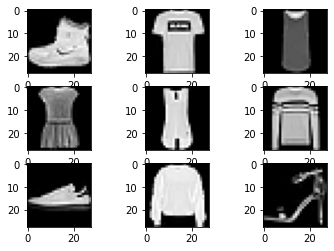

In [ ]:
#Importing MNIST dataset
from matplotlib import pyplot
import matplotlib as plt 

from keras.datasets import fashion_mnist
# load dataset
(trainX, trainY), (testX, testY) = fashion_mnist.load_data() #Loading data
#Plot first 9 images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

# Loading the Fashion-MNIST Train Data and Test Data 

In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print(tf.__version__, ' ', tf.keras.__version__)

x_train shape: (60000, 28, 28) y_train shape: (60000,)
2.4.1   2.4.0


# Measure of accuracy

The most effective measure of success for a multi-class classification problem such as MNIST fashion is the <b> cross-entropy loss function </b>. This loss function is used to measure the success as it is intended for problems in a small range of values, where each class is assigned a unique integer. 

Mathematically, the cross-entropy function will calculate the average difference between actual and predicted input distribution for every class present in this specific problem, therefore a perfect loss value would be 0.

The Keras built-in cross-entropy loss function is called <b> categorical cross-entropy </b>, which will be used as a reference. 
In conjugation with categorical cross-entropy loss function, given that the aim of this problem is to produce a probability score for each class, the <b> softmax </b> activation will be applied on the last Dense layer. 

# Evaluation Protocol

Given the large sufficiency and amount of samples available for both training and testing, hold-out validation is going to be the reference model evaluation validation method. In order to estimate closely the performance of a model, k-fold validation with 5 folds could be potentially implemented in later stages.

In [35]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


# Baseline Model

For the development of a baseline model for the MNIST-Fashion classification problem, a systematic method must be followed. First, loading the dataset, pre-processing and preparing the dataset, defining and building models, evaluation of the model and examining the processes mentioned using appropriate results presentations and accuracy and loss plot renderings will enable the construction of a baseline model from which insightful results can be obtained. Baseline accuracy can be referred to as 90% accuracy for this specific problem. 

# Data Preparation

<h3> Data Normalization (Vectorization) </h3>

Data normalization is required to reshape the dimension of the data into a range of smaller scale values in order to obtain the best representations from the networks in upcoming sections.

In [36]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

<h3> Validation, training and test datasets </h3>

During Deep Learning training, it is essential to have <b> Training data </b> used for training the model. 

<b> Validation data </b> which is used for fine tuning the hyperparameters and evaluate the model to find the best settings 

The <b> Test data </b> is used to test the final model after training and adjustments coming from the validation set. 

In [37]:
#Hold-out validation applied to the training set. 
#The training data is divided into training and validation data. 
#5000 samples are assigned to the validation set.
#Mathematically, this assigns 50,000 samples to the training set.


(x_train, x_valid) = x_train[5000:], x_train[:5000] #Python Slice Operation for Dataset split. 
(y_train, y_valid) = y_train[5000:], y_train[:5000] #Python Slice Operation for Dataset split. 

# Reshaping input data from into (28, 28, 1) for tensor facility. 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_valid = x_valid.reshape(x_valid.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

<h3> One-hot encoding samples </h3>

One-hot encoding samples enables conversion of labels to floating point valued tensors.

In [38]:
# One-hot encoding the labels for training, validation and test data.
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print Shape 
print("Shape of Training, Validation & Test Dataset")
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape, "y_train shape:", y_valid.shape)
print("x_test shape:", x_test.shape, "y_train shape:", y_test.shape)

Shape of Training, Validation & Test Dataset
x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
x_valid shape: (5000, 28, 28, 1) y_train shape: (5000, 10)
x_test shape: (10000, 28, 28, 1) y_train shape: (10000, 10)


# Loss & Accuracy Plot Functions 

In [39]:
#Function designed to plot values for comparision 
#plot loss will plot the loss of the validation data and the loss of the training data against epochs number
import matplotlib.pyplot as plt 
def plot_loss():
    history_dict = history.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']
    epochs = range(1, len(loss) + 1)
    blue_dots = 'bo'
    solid_blue_line = 'b'
    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    #plt.savefig('overfitting.eps', format = 'eps')
    plt.show()
#plot loss will plot the accuracy of the validation data and the loss of the training data against epochs number
def plot_acc():
    plt.clf()
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label = 'Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Building the Network

The network will consist of <b> sequential </b> layers in order to build a neural network one layer at a time in sequence. This attributes a format to the network which has an <b> input layer </b> at the start, then a sequence of <b> hidden layers </b> and finally an <b> output layer </b>

For approaching an image classification problem, a <b> Conv2D() </b> layer is necessary. This creates a 2D convolutional layer or kernel to produce a tensor of outputs. 

<b> Pooling() </b> layers are also needed in an image classification problem and are part of convolutional neural networks in order to reduce the spatial size of the image representations and the number of parameters - simplify information in the output. A pooling is used immediately after convolutional layers. 

Given that there are 10 different classes one clothing item can be associated to, the network must have a softmax activation at the end, any intermediate Dense layer with less than 10 units can cause information <b> bottleneck </b>. 

The optimizer used for this problem is <b> adam </b>. 
Adam is a good algorithm for stochastic gradient descent for finding the gradient of a loss function through a series of chain rule differentiation and the aid of momentum. This gradient descent algorithm works well in conjugation with the categorical_crossentropy loss function, therefore it will be implemented as the main optimizer of reference. 

In [54]:
#Model with Best Performance and Low Overfitting. 

from tensorflow.keras import layers
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(layers.BatchNormalization()) #Batch Normalization Layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3)) #Set Dropout

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax')) #Last layer should be softmax activated


## Compilation of  Model
The compilation of the training model must contain the relevant metrics (Accuracy), the loss function discusses (Categorical_Crossentropy) and an Optimizer (adam).


In [55]:
from tensorflow import keras
#opt = keras.optimizers.Adam(learning_rate=0.050)
#Code commented out used for adjusting learning rates. 
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#  Training Model


In [56]:
from keras.callbacks import ModelCheckpoint
import keras 

callbacks_list = [
    keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2), # stop if no impr. for 1 epoch
    keras.callbacks.ModelCheckpoint(filepath='my_model.h5', 
                                    monitor='val_loss', # only overwrites if loss improves
                                    save_best_only=True)
]

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', save_best_only=True)
history = model.fit(x_train,
         y_train,
         batch_size=256,
         epochs=40,
         #callbacks=callbacks_list, useful during training
         validation_data=(x_valid, y_valid)) #training with validation data

Epoch 1/40
215/215 [==============================] - 3s 10ms/step - loss: 1.0592 - accuracy: 0.6887 - val_loss: 2.4586 - val_accuracy: 0.4532
Epoch 2/40
215/215 [==============================] - 2s 9ms/step - loss: 0.4715 - accuracy: 0.8315 - val_loss: 1.3604 - val_accuracy: 0.6784
Epoch 3/40
215/215 [==============================] - 2s 9ms/step - loss: 0.4006 - accuracy: 0.8526 - val_loss: 0.3631 - val_accuracy: 0.8730
Epoch 4/40
215/215 [==============================] - 2s 9ms/step - loss: 0.3596 - accuracy: 0.8688 - val_loss: 0.3368 - val_accuracy: 0.8828
Epoch 5/40
215/215 [==============================] - 2s 9ms/step - loss: 0.3354 - accuracy: 0.8776 - val_loss: 0.2631 - val_accuracy: 0.9044
Epoch 6/40
215/215 [==============================] - 2s 9ms/step - loss: 0.3191 - accuracy: 0.8832 - val_loss: 0.2636 - val_accuracy: 0.9028
Epoch 7/40
215/215 [==============================] - 2s 9ms/step - loss: 0.3028 - accuracy: 0.8901 - val_loss: 0.2577 - val_accuracy: 0.9066
Epoch

In [51]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Loss against Epoch of Best Model

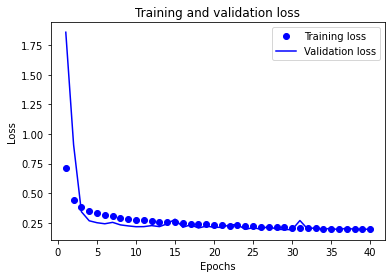

In [52]:
plot_loss()

Accuracy against Epoch of Best Model

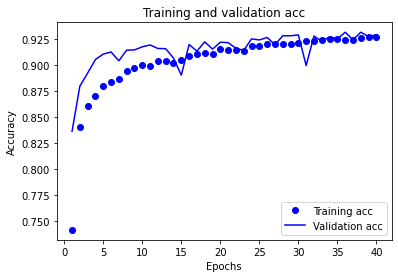

In [53]:
plot_acc()

<h4> Model Summary Of the Final Training Model </h4>
Model Using 814, 442 Parameters out of which 192 are non-trainable.
The number of trainable parameters is 814,250.

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 32)        160       
_________________________________________________________________
batch_normalization_10 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
batch_normalization_11 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 64)        

# Experimentations Log Table

 This subsection contains a table of results about experiments which shows an evaluation of different layer types, sizes, number, units, hyperparameters and monitoring in order to define the best charachteristics for obtaining the best performance in a systematic and experimental method. 

The approach for a classification problem like MNIST-Fashion is to build reference models that <b> underfit </b> and <b> overfit </b>. Underfitting occurs when both validation and training loss lower. Building a very small model typically results in underfitting, this is because the network does not have the means of learning useful representations, therefore fails at making good generalisations and have statistical power. Overfitting, on the other hand, occurs due to eccessive learnings from training data, and can be cured using <b> regularisation tuning techniques </b>. 

The first two experimentations involved building an overfitting, and an underfitting model, and depending on the performance, making changes and decisions to achieve the best validation accuracy and cure overfitting at the same time. 

In [57]:
#Results table created thanks to Pandas. 

import pandas as pd
results = [ 
        ['','Number of Conv2D and MaxPool Stack', '' , '' , '', ''],
        ['1','1 Conv2D, 1 MaxPooling2D, Dense(20), Dense(10)', 0.2637,  0.9144, '13/20', 'Small Network --> Some Initial Underfitting'],
        ['2','1 Conv2D, 1 MaxPooling2D, Dense(256), Dense(10)', 0.2649,  0.9178, '8/20', 'Substantial Overfitting'],
        ['', '' , '' , '', '',''],
        ['','Increasing Filter Size -> 32, 64, 128 in CNNs', '' , '' , '', ''],
        ['3','2 Conv2D, 2 MaxPooling2D, Dense(256), Dense(10)', 0.2379,  0.9274, '11/20', 'High val_acc. Slightly Less Overfitting'],
        ['4','3 Conv2D, 3 MaxPooling2D, Dense(256), Dense(10)', 0.2105,  0.9222, '8/20', 'Low val_loss. Less Overfitting '],
        ['5','4 Conv2D, 4 MaxPooling2D, Dense(256), Dense(10)', 0.2256,  0.9186, '9/20', 'Low Performance. Overfitting present'],
        ['', '' , '' , '','',''],
        ['','Adding Dropout', '' , '' , '', ''],
        ['6','Add Dropout(0.3) to Conv2D layers in Exp No. 3 ', 0.2004,  0.9280, '20/20', 'High val_acc. Overfitting drastically Cured'],
        ['7','Add Dropout(0.3) to Conv2D layers in Exp No. 4 ', 0.2117,  0.9238 ,  '19/20', 'New High val_acc. Little/No Overfitting'],
        ['', '' , '' , '','',''],
        ['','Graphs: best val_acc could be in later Epochs.', '' , '' , '', ''],
        ['','Training for 40 Epochs To Find Optimal.', '' , '' , '', ''],
        ['8','Repeat Experiment No. 6 For 40 Epochs ', 0.2113,  0.9284 ,  '33/40', 'More Epochs Improved Performance'],
        ['9','Repeat Experiment No. 7 For 40 Epochs ', 0.2025,  0.9278 ,  '35/40', 'Low val_loss. 2 Conv2D produce high val_acc'],
        ['', '' , '' , '','',''],
        ['','Experimenting Dense Layer Units & No. of Layers', '' , '' , '', ''],
        ['','Stack of 2 Conv2D Layers as Conv Base ', '' , '' , '', ''],
        ['','Upcoming Experiments Concern Last Layers ', '' , '' , '', ''],
        ['10','Dense(256), Dense(64), Dense(10) ', 0.2124 ,  0.9268 ,  '23/40', 'Good val_acc. Overfitting After 15th Epoch'],
        ['11','Dense(64), Dense(10) ', 0.2019,  0.9266 ,  '40/40', ' Very small Overfitting After 30th Epoch'],
        ['12','Dense(256), Dense(10) ', 0.2002,  0.9324 ,  '32/40', 'Very High acc_val. Overfitting After Epoch 15'],
        ['13','Dense(256), Dropout(0.5). Dense(10) ', 0.2003,  0.9292 ,  '34/40', 'Good acc_val and loss. Little/no Overfitting'],
        ['', '' , '' , '','',''],
        ['','Best Model: ', '' , '' , '', ''],
        ['','2 Conv2D - Dense(256) - Dense(10) ', '' , '' , '', ''],
        
        ['','Chaning (adam) Learning Rate For Best Model', '' , '' , '', ''],
        ['14','Learning Rate: 0.001  ', 0.2153,   0.9204 ,  '37/40', 'Results obtained did not improve previous'],
        ['15','Learning Rate: 0.003 ', 0.2335,  0.9176 ,  '33/40', 'No Substantial Improvement. Large Overfitting'],
        ['16','Learning Rate: 0.050 ', 2.3027,  0.1112 ,  '25/40', 'Bad Performance'],
         ['', '' , '' , '','',''],
        ['','Adding Batch Normalization ', '' , '' , '', ''],
        ['17','Add Normalization Layer after Conv2D', 0.2097 ,  0.9376 ,  '37/40', 'High Performance Obtained. Little/no Overfitting'],
         ['', '' , '' , '','',''],
        ['','Inspecting & Monitoring ', '' , '' , '', ''],
         ['18','Add Callbacks Functionality','' , ''  ,  '', 'Optimal epoch lies between 33-38'],

        
       ]

df = pd.DataFrame(results, columns=["Experiment No", "Network Layer & Size", "validation loss", 'validation accuracy', "Epoch No",'Comment'])
#df.style.hide_index()
df

,Experiment No,Network Layer & Size,validation loss,validation accuracy,Epoch No,Comment
0,,Number of Conv2D and MaxPool Stack,,,,
1,1,"1 Conv2D, 1 MaxPooling2D, Dense(20), Dense(10)",0.2637,0.9144,13/20,Small Network --> Some Initial Underfitting
2,2,"1 Conv2D, 1 MaxPooling2D, Dense(256), Dense(10)",0.2649,0.9178,8/20,Substantial Overfitting
3,,,,,,
4,,"Increasing Filter Size -> 32, 64, 128 in CNNs",,,,
5,3,"2 Conv2D, 2 MaxPooling2D, Dense(256), Dense(10)",0.2379,0.9274,11/20,High val_acc. Slightly Less Overfitting
6,4,"3 Conv2D, 3 MaxPooling2D, Dense(256), Dense(10)",0.2105,0.9222,8/20,Low val_loss. Less Overfitting
7,5,"4 Conv2D, 4 MaxPooling2D, Dense(256), Dense(10)",0.2256,0.9186,9/20,Low Performance. Overfitting present
8,,,,,,
9,,Adding Dropout,,,,


After building underfitting and overfitting models, the correct structure of the convolutional base of the model has been experimented, trying different number of Conv2D and MaxPooling layers. Overfitting has been cured using dropout, which also increased the performance of the model. After understanding that the best model consisted in a stack of 2 Conv2D layers, Batch Normalization has been added to enhance the performance of the network. Batch Normalization acts as a data preprocessing layer for each convolutional layer, so normalisation is applied between layers, which ultmately improves accuracy. 

# Plotting Performance of Key Models 

All images are saved in the folder called <b> images </b> present in the zip folder as part of the submission of this report. The designated name of the image corresponds to an experiment recorded in the table above for cross-referencing. The images can be visualised even without the presence of the images folder as it is saved on the cell.

Experiment 2 generated a model which is substantially <b> overfitting</b>.This model consisted of a Conv2D layer, MaxPooling, Dense(256) and the Softmax activated Dense(10) layer. The validation loss increases as the training loss decreases overfitting. This model did not produce a high validation accuracy and the generalisation power is not great as training and validation accuracy are not closely aligned. Using a model that overfits as a reference for starting is a typical Machine Learning practice.

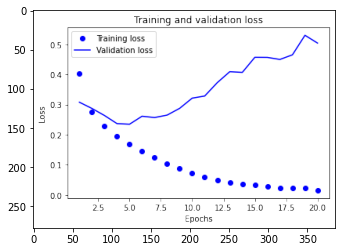

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = mpimg.imread('images/Experiment2Loss.png')
imgplot = plt.imshow(image)

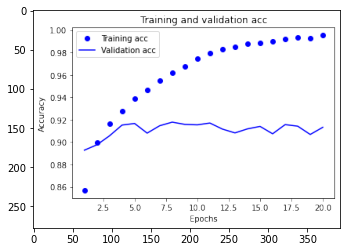

In [12]:
image = mpimg.imread('images/Experiment2Accuracy.png')
imgplot = plt.imshow(image)

In Experiment 8, the decision to train for longer epochs up to 40 has been made. This was to both obtain the best validation accuracy for the model, and also to understand better the point of overfitting. The <b> regularisation tuning </b> technique applied in the plots below include <b> dropout layers </b> after each convolutional layer (in this case 2), both dropout values set at 0.3. Overfitting has been reduced and performance has increased. 

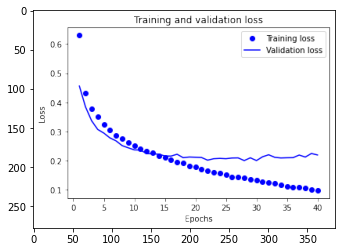

In [13]:
image = mpimg.imread('images/Experiment8Loss.png')
imgplot = plt.imshow(image)

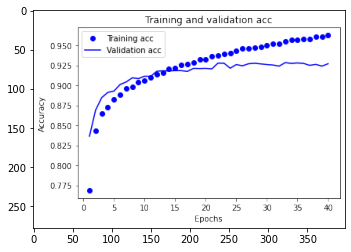

In [14]:
image = mpimg.imread('images/Experiment8Accuracy.png')
imgplot = plt.imshow(image)

After a series of experimentations and hyperparameter tunings, Batch Normalization layers have been added to the stack of 2 Conv2D layers in Experiment 17. This has cured overfitting even further, bringing it to a minimal amount. The model has now <b> statistical power </b> and can be used to make generalisations. 

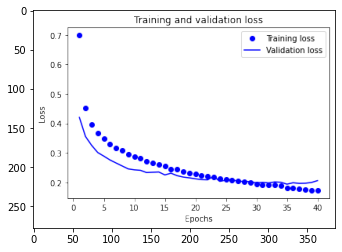

In [15]:
image = mpimg.imread('images/Experiment17Loss.png')
imgplot = plt.imshow(image)

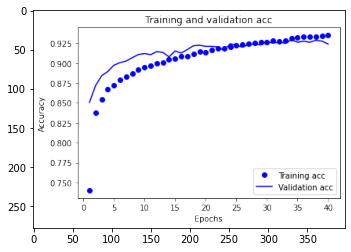

In [16]:
image = mpimg.imread('images/Experiment17Accuracy.png')
imgplot = plt.imshow(image)

<h3> Additional Plots </h3>

Small Model: 1 Conv2D - MaxPooling - Dense(20) - Dense(10) 

The upcoming plots show underfitting - The model is too small and cannot capture enough details to understand useful representations. 

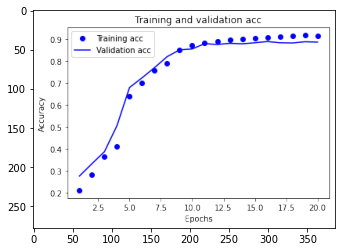

In [18]:
image = mpimg.imread('images/Experiment1Accuracy.png')
imgplot = plt.imshow(image)

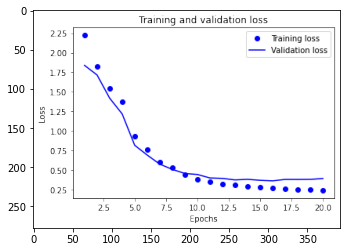

In [19]:
image = mpimg.imread('images/Experiment1Loss.png')
imgplot = plt.imshow(image)


# New Network To Evaluate on Test Data - Using Best Model

The Optimal Epoch was individuated thanks to the callback functionalities implemented during training, this can be cross-referenced with the table of results. The ideal epoch number was in the range of 33-38 epochs. The highest validation accuracy was recorded at the 37th epoch, therefore the new model will be trained for 37 epochs. 

In [61]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers, losses


model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#Train on Training Data, Evaluate on Test Data
model.fit(x_train,
         y_train,
         batch_size=256,
         epochs=37,
         validation_data=(x_valid, y_valid))



Epoch 1/37
215/215 [==============================] - 3s 10ms/step - loss: 1.0400 - accuracy: 0.6906 - val_loss: 5.5023 - val_accuracy: 0.3662
Epoch 2/37
215/215 [==============================] - 2s 9ms/step - loss: 0.4574 - accuracy: 0.8314 - val_loss: 2.2776 - val_accuracy: 0.6016
Epoch 3/37
215/215 [==============================] - 2s 9ms/step - loss: 0.3973 - accuracy: 0.8531 - val_loss: 0.3831 - val_accuracy: 0.8696
Epoch 4/37
215/215 [==============================] - 2s 9ms/step - loss: 0.3544 - accuracy: 0.8697 - val_loss: 0.3148 - val_accuracy: 0.8882
Epoch 5/37
215/215 [==============================] - 2s 9ms/step - loss: 0.3345 - accuracy: 0.8765 - val_loss: 0.2738 - val_accuracy: 0.9018
Epoch 6/37
215/215 [==============================] - 2s 9ms/step - loss: 0.3203 - accuracy: 0.8797 - val_loss: 0.2607 - val_accuracy: 0.9046
Epoch 7/37
215/215 [==============================] - 2s 9ms/step - loss: 0.2988 - accuracy: 0.8871 - val_loss: 0.2913 - val_accuracy: 0.8956
Epoch

# Evaluation on Test Data

In [62]:
#Network.evaluate to test unseen data performance.
results = model.evaluate(x_test, y_test)
results

313/313 [==============================] - 1s 2ms/step - loss: 0.2769 - accuracy: 0.9231


[0.2769222557544708, 0.9230999946594238]

# Conclusion & Findings

The accuracy on the unseen test data has produced an accuracy of 92.31% which is 2.31% higher than the baseline established for this experimental investigation of the MNIST-fashion classification problem, the loss on the test data was 0.2769. Despite achieving around 93.7% accuracy and around 0.2000 for loss, it is normal in Machine Learning context that the performance on unseen data is usually lower than on training data, however the difference in performance is not marginally different which is a positive note.

In the previous report, the IMDB classification problem was tackled, and one of the main issues involved not being able to obtain any gain in accuracy through adding dropout layers, this has been justified by stating that the complexity of the IMBD classification was relatively low. It was pleasing to train and evaluate Convolutional Neural Networks with dropout layers and batch normalization and obtain a gain in the validation and test accuracy for the MNIST-Fashion problem, which reinforces that this classification problem has a higher degree of complexity compared to a binary classification problem such as IMDB. 

Hold-out validation has proven effective throughout the course of the experimentations. The Default adam learning rate for the optimizer has been kept as adjusting this hyperparameter did not produce any enhanced performance. Regularisation techniques that have been applied (dropout) successfully reduced substantial overfitting making final model good at generalisation and increased statistical power. The exemplar notebook provided as part of the second Undergraduate Coursework 2 that tackled the MNIST-Fashion problem without using batch normalization or dropout layers has achieved a near 90% accuracy on unseen data whereas my model has achieved a 92.31% on unseen data, this reinforces the point that the results obtained in this experiment are reliable and reproducible by other Deep Learning engineers. 

Medium. 2021. Fashion-MNIST with tf.Keras. [online] Available at: <https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a> [Accessed 29 January 2021].
